<a href="https://colab.research.google.com/github/lailigita2604/Business-Decision-Research/blob/main/Data_Analyst_Project_Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DQLAB PROJECT - Data Analyst Project: Business Decision Research**

This is a project from Data Science Academy, DQLAB, and this project is one of project to complete Data Analyst Path Learning

**DATASET**

https://storage.googleapis.com/dqlab-dataset/data_retail.csv
The dataset is from DQLAB Academy about The Sales of Sport Shop such as Baju, Jaket, Tas, etc. This dataset contains 8 columns :  No, Row_Num, Customer_ID, Product, First_Transaction, Last_Transaction, Average_Transaction_Amount, Count_Transaction.

# DATA PREPARATION

In [69]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [70]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [71]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = 1 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = 0 


2019-02-01 23:57:57.286000128


In [72]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']


# DATA VISUALIZATION

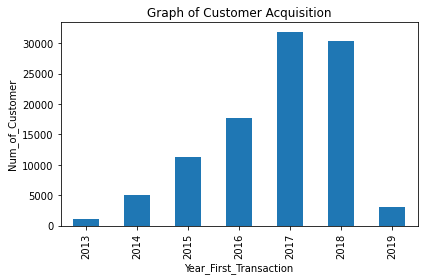

In [73]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

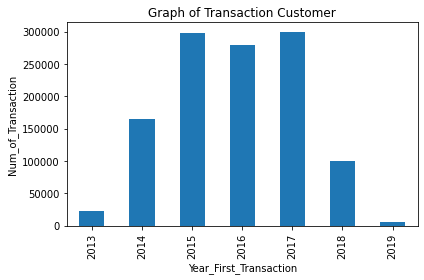

In [74]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

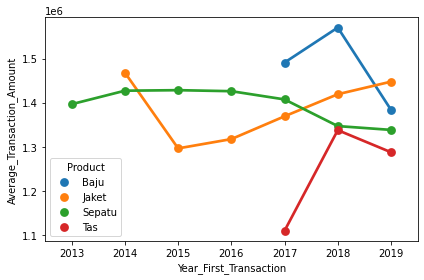

In [75]:
import seaborn as sns

sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

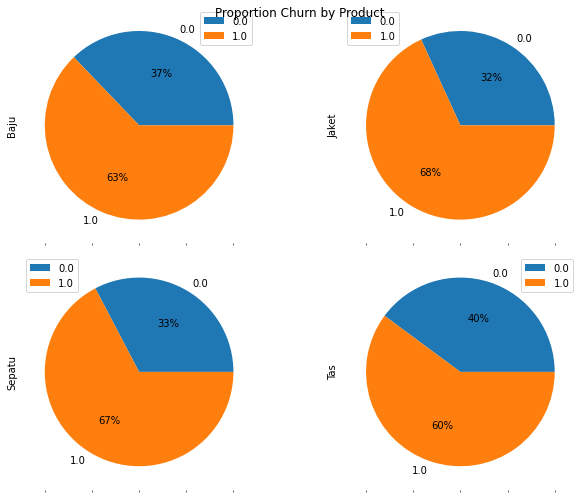

In [87]:
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

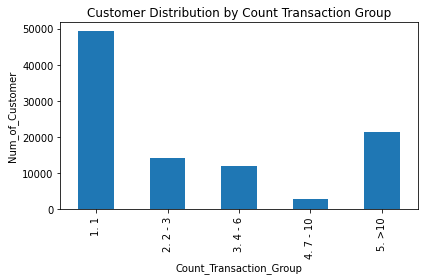

In [77]:
# Kategorisasi jumlah transaksi
def func(row):
  if row['Count_Transaction'] == 1:
    val = '1. 1'
  elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
    val ='2. 2 - 3'
  elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
    val ='3. 4 - 6'
  elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
    val ='4. 7 - 10'
  else:
    val ='5. >10'
  return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

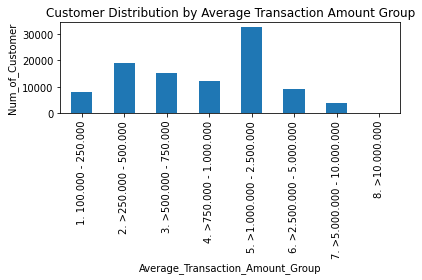

In [78]:
# Kategorisasi rata-rata besar transaksi
def f(row):
  if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
    val ='1. 100.000 - 250.000'
  elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
    val ='2. >250.000 - 500.000'
  elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
    val ='3. >500.000 - 750.000'
  elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
    val ='4. >750.000 - 1.000.000'
  elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
    val ='5. >1.000.000 - 2.500.000'
  elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
    val ='6. >2.500.000 - 5.000.000'
  elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
    val ='7. >5.000.000 - 10.000.000'
  else:
    val ='8. >10.000.000'
  return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Modelling : Make Predictor

In [79]:
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns] 
y = df['is_churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [80]:
y_train = y_train.astype(int)

In [81]:
y_train.head()

2606     0
57228    0
8382     1
60281    1
48432    0
Name: is_churn, dtype: int64

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

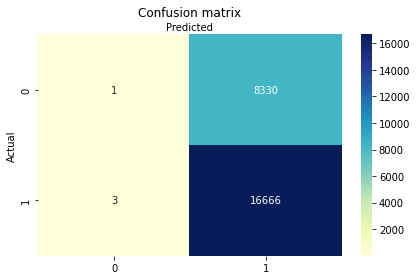

In [83]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()